In [9]:
print(df.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   average_score performance  
0      72.666667        High  
1      82.333333        High  
2      92.666667        High  
3      49.333333         Low

In [10]:
print(df.columns)


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average_score', 'performance'],
      dtype='object')


In [11]:
df_encoded = df.copy()

In [12]:
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

In [13]:
df_encoded['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

In [14]:
threshold = 70
df_encoded['performance'] = df_encoded['average_score'].apply(lambda x: 'High' if x >= threshold else 'Low')

In [15]:
le_perf = LabelEncoder()
df_encoded['performance_label'] = le_perf.fit_transform(df_encoded['performance'])

In [16]:
print(df_encoded[['average_score', 'performance', 'performance_label']].head())

   average_score performance  performance_label
0      72.666667        High                  0
1      82.333333        High                  0
2      92.666667        High                  0
3      49.333333         Low                  1
4      76.333333        High                  0


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

C:\Users\user\AppData\Local\Temp\ipykernel_13704\2965295236.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_encoded, x='performance', palette='Set2')


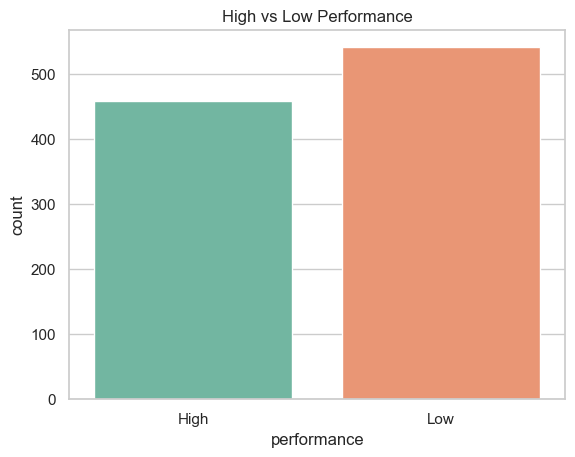

In [18]:
sns.countplot(data=df_encoded, x='performance', palette='Set2')
plt.title("High vs Low Performance")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13704\1824472408.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, x='gender', y='average_score', palette='pastel')


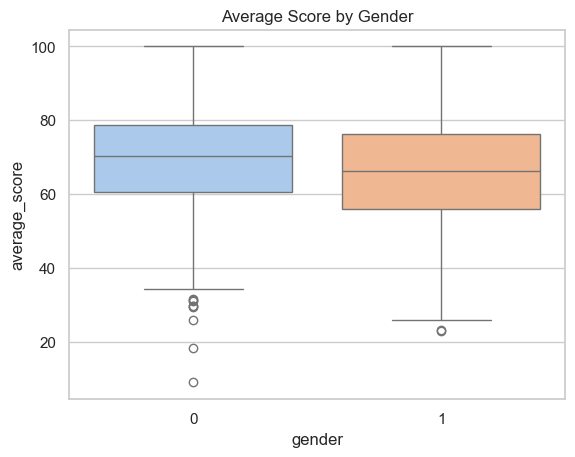

In [19]:
sns.boxplot(data=df_encoded, x='gender', y='average_score', palette='pastel')
plt.title("Average Score by Gender")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13704\1916658533.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, x='test preparation course', y='average_score', palette='coolwarm')


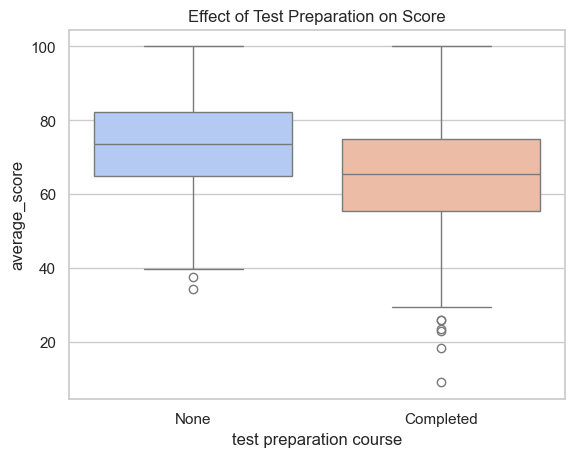

In [20]:
sns.boxplot(data=df_encoded, x='test preparation course', y='average_score', palette='coolwarm')
plt.title("Effect of Test Preparation on Score")
plt.xticks([0, 1], ['None', 'Completed'])  # If encoded
plt.show()

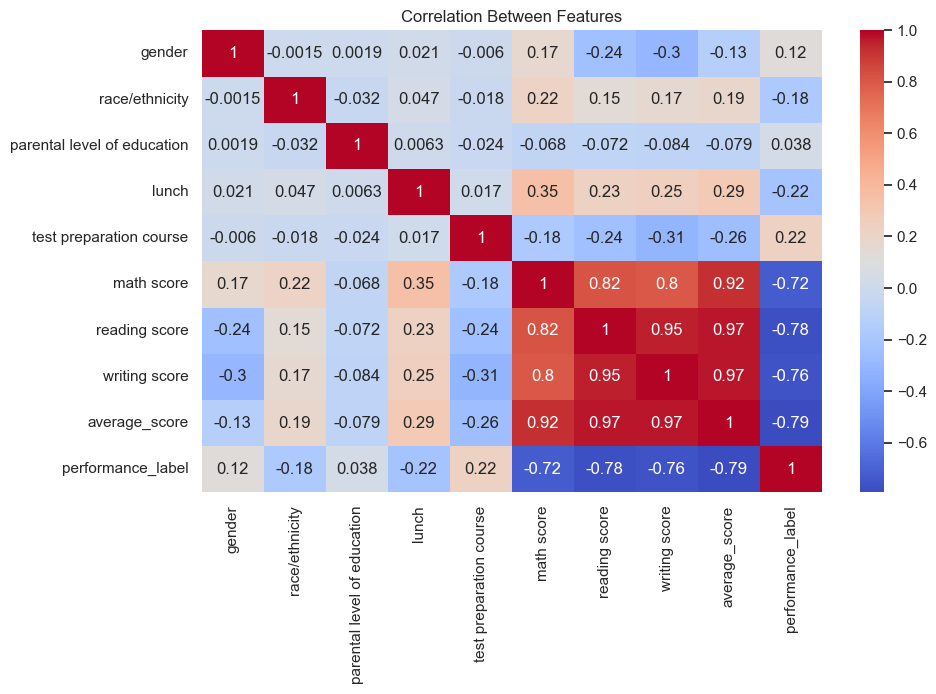

In [23]:
plt.figure(figsize=(10, 6))


numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])


sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

plt.title("Correlation Between Features")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split


X = df_encoded.drop(['performance', 'performance_label'], axis=1)
y = df_encoded['performance_label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00       110

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:
 [[ 90   0]
 [  0 110]]


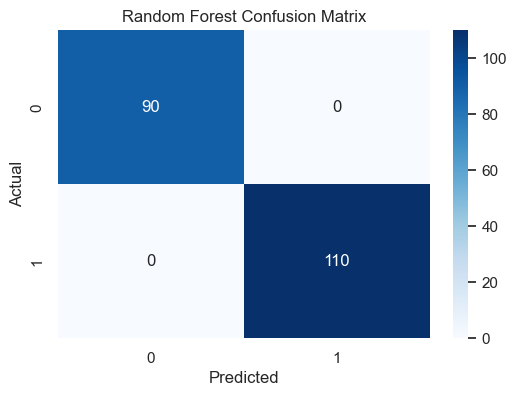

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00       110

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print("Classification Report:\n", classification_report(y_test, y_pred))


In [27]:
# Check feature columns (should NOT include target columns)
print("Features:", X.columns.tolist())

# Quick check if target is accidentally in features
print("Is 'performance_label' in features?", 'performance_label' in X.columns)

# Double-check sizes
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")
print(f"Train labels distribution:\n{y_train.value_counts()}")
print(f"Test labels distribution:\n{y_test.value_counts()}")


Features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'average_score']
Is 'performance_label' in features? False
Train size: (800, 9), Test size: (200, 9)
Train labels distribution:
performance_label
1    431
0    369
Name: count, dtype: int64
Test labels distribution:
performance_label
1    110
0     90
Name: count, dtype: int64


In [28]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())


Cross-validation scores: [1. 1. 1. 1. 1.]
Average CV score: 1.0


In [30]:
import joblib

# Assuming rf_model is your trained Random Forest model object
joblib.dump(rf_model, 'random_forest_model.joblib')


['random_forest_model.joblib']